## Advance Visualization

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

In [10]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

In [11]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [14]:
df_can.set_index('Country', inplace=True)

In [15]:
df_can.columns = list(map(str, df_can.columns)) 

In [19]:
df_can['Total'] = df_can.sum(axis=1)

In [21]:
years = list(map(str, range(1980,2014)))

### Waffle Chart

In [23]:
df_waffle = df_can.loc[['Denmark','Sweden','Norway']]

###### step 1. calculate proportion

In [29]:
total = df_waffle['Total'].sum()

In [30]:
proportion = []

for index, row in df_waffle.iterrows():
    print(index, row['Total'])
    proportion.append(row['Total']/total)

Denmark 3901
Sweden 5866
Norway 2327


In [31]:
proportion

[0.32255663965602777, 0.48503390110798744, 0.1924094592359848]

###### step 2. determine size chart

In [32]:
width = 40
height = 10
tile_size = width * height

In [33]:
tile_size

400

###### step 3

In [34]:
tile_per_category = [round(prop * tile_size) for prop in proportion]

In [37]:
for i, (index, row) in enumerate(df_waffle.iterrows()):
    print(index, tile_per_category[i])

Denmark 129
Sweden 194
Norway 77


In [38]:
np.sum(tile_per_category)

400

###### step 4

In [41]:
mat = np.zeros((height, width))

In [42]:
mat.shape

(10, 40)

In [59]:
ix = 0
tiles_planted = 0

for j in range(width):
    for i in range(height):
        
        if tiles_planted >= tile_per_category[ix]:
            ix += 1
            tiles_planted = 0
            
        mat[i,j] = ix
        tiles_planted += 1

In [60]:
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
   

###### step 5. contruct plot

<Figure size 864x576 with 0 Axes>

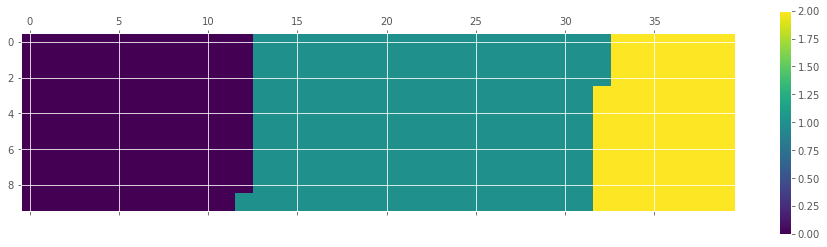

In [61]:
fig = plt.figure(figsize=(12,8))

colormap = plt.cm.coolwarm
plt.matshow(mat)
plt.colorbar()
plt.show()

###### step 6. styling plot

<Figure size 864x576 with 0 Axes>

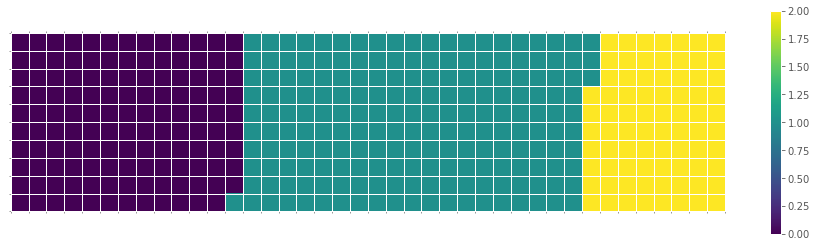

In [64]:
fig = plt.figure(figsize=(12,8))

colormap = plt.cm.coolwarm
plt.matshow(mat)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5,width,1),minor=True)
ax.set_yticks(np.arange(-.5,height,1),minor=True)
ax.grid(which='minor', color='w',linestyle='-',linewidth=1)
plt.xticks([])
plt.yticks([])

plt.show()

###### step 7. adding legend

<Figure size 864x576 with 0 Axes>

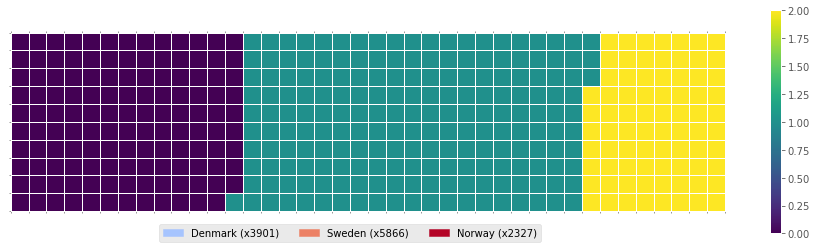

In [73]:
fig = plt.figure(figsize=(12,8))

colormap = plt.cm.coolwarm
plt.matshow(mat)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5,width,1),minor=True)
ax.set_yticks(np.arange(-.5,height,1),minor=True)
ax.grid(which='minor', color='w',linestyle='-',linewidth=1)
plt.xticks([])
plt.yticks([])

val_cumsum = np.cumsum(df_waffle['Total'])
total_values = val_cumsum[len(val_cumsum)-1]

legend_list = []

for i,(ix,row) in enumerate(df_waffle.iterrows()):
    labelstr = f"{ix} (x{row['Total']})"
    colorval = colormap(val_cumsum[i]/total_values)
    legend_list.append(mpatches.Patch(color=colorval, label=labelstr))

plt.legend(handles=legend_list,loc='lower center', ncol=len(df_waffle.index.values), bbox_to_anchor=[0,-0.2,0.95,1])
plt.show()

### word cloud

In [75]:
!pip install wordcloud

In [76]:
from wordcloud import WordCloud, STOPWORDS

In [89]:
alice_novel = open('alice_novel.txt','r').read()

In [90]:
stopwords = set(STOPWORDS)

In [91]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

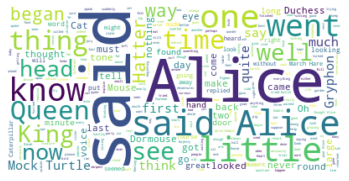

In [93]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

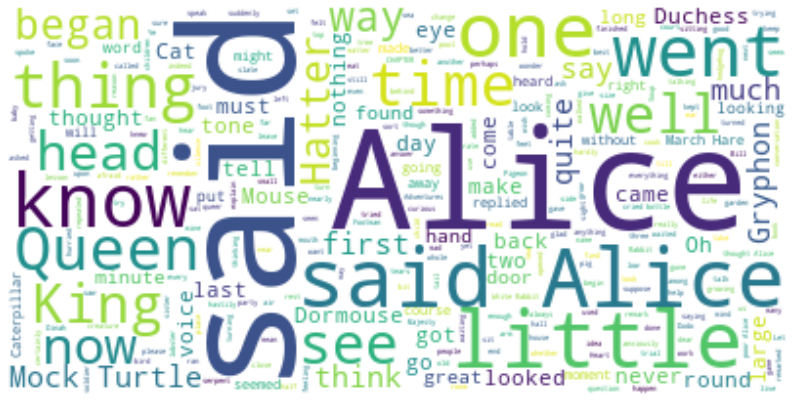

In [94]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

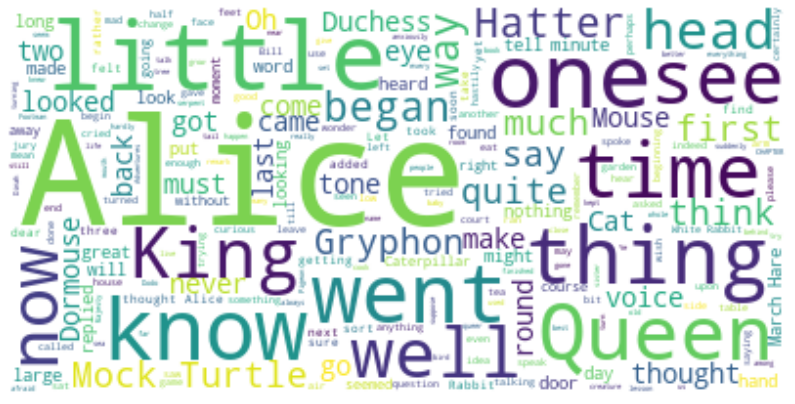

In [95]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [96]:
alice_mask = np.array(Image.open('alice_mask.png'))

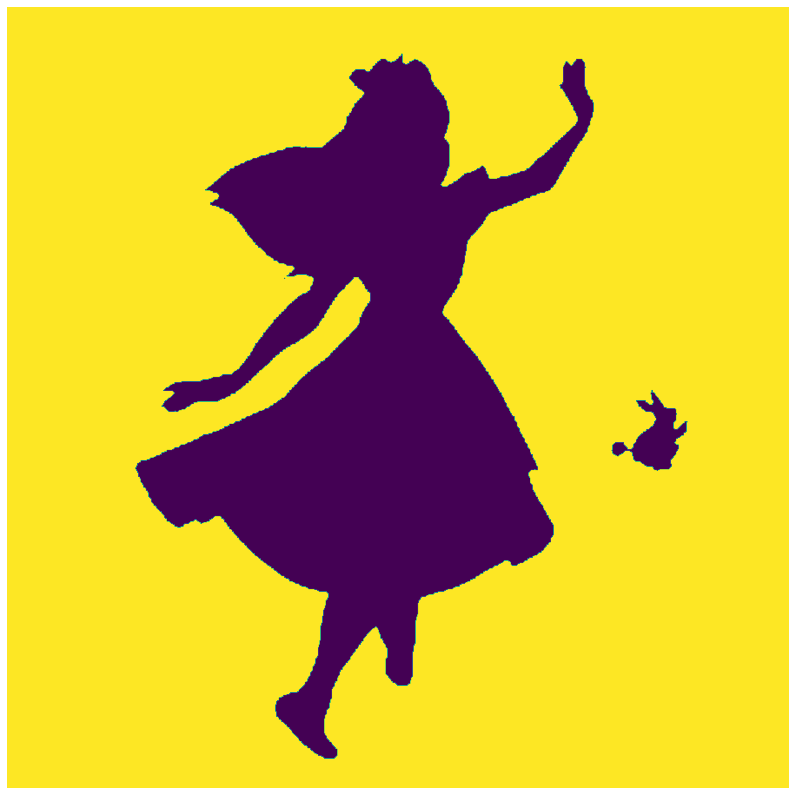

In [97]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask,interpolation='bilinear')
plt.axis('off')
plt.show()

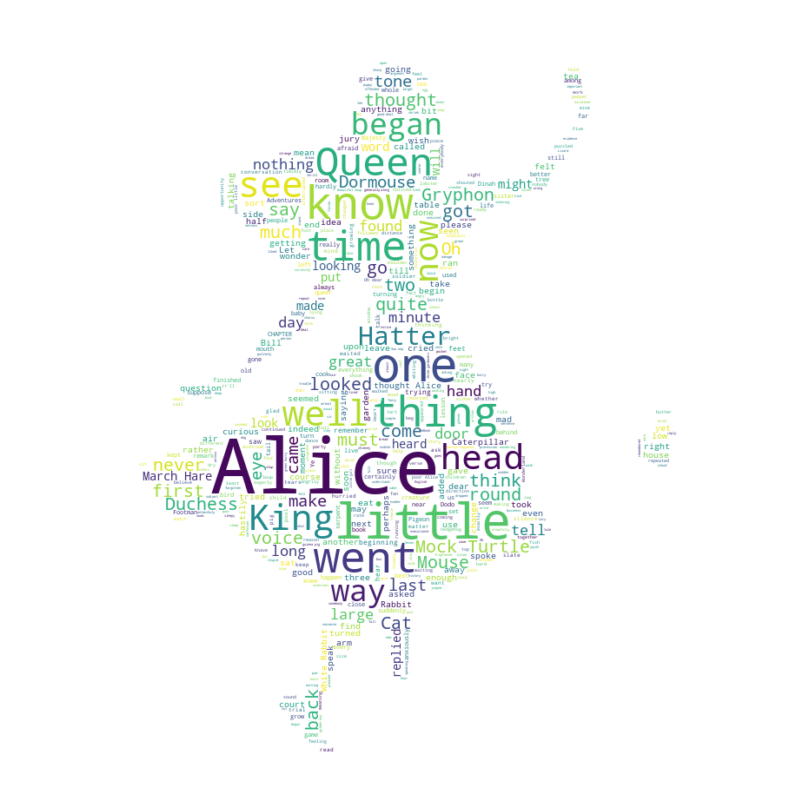

In [99]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [100]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [101]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ')*repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [102]:
wordcloud = WordCloud(background_color='white').generate(word_string)

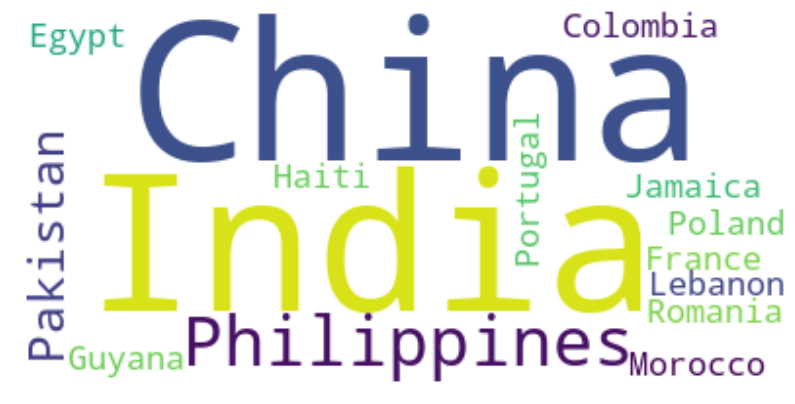

In [103]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plot

In [105]:
import seaborn as sns

In [106]:
df_total = pd.DataFrame(df_can[years].sum(axis=0))

In [107]:
df_total.reset_index(inplace=True)

In [112]:
df_total.columns = ['year', 'total']

In [113]:
df_total['year'] = df_total['year'].apply(float)
df_total['total'] = df_total['total'].apply(float)

In [114]:
df_total.head()

,year,total
0,1980.0,99137.0
1,1981.0,110563.0
2,1982.0,104271.0
3,1983.0,75550.0
4,1984.0,73417.0


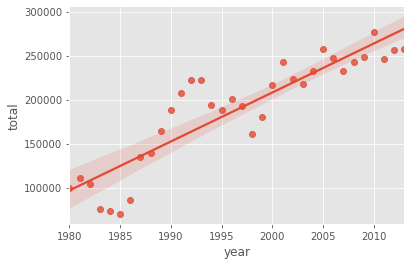

In [116]:
ax = sns.regplot(data=df_total, x='year', y='total')

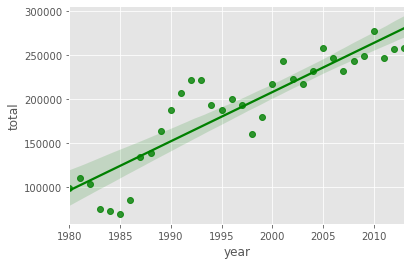

In [117]:
ax = sns.regplot(data=df_total, x='year', y='total', color='green')

Text(0.5, 1.0, 'Total Immigration to Canada')

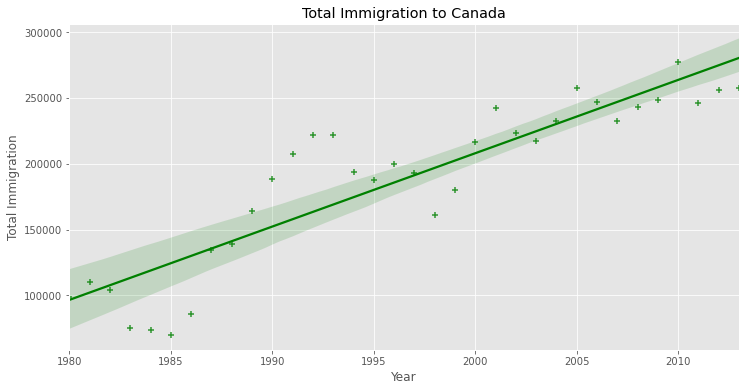

In [122]:
plt.figure(figsize=(12,6))
ax = sns.regplot(data=df_total, x='year', y='total', color='green', marker='+')

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada')

### Folium

In [125]:
!pip install folium

In [126]:
import folium

In [127]:
world_map = folium.Map()
world_map

In [132]:
world_map = folium.Map(location=[-3.8261537363618503, 102.29812952222728], zoom_start=15)
world_map

In [136]:
world_map = folium.Map(location=[-3.8261537363618503, 102.29812952222728], zoom_start=8, tiles='Stamen Toner')
world_map

In [138]:
world_map = folium.Map(location=[-3.8261537363618503, 102.29812952222728], zoom_start=14, tiles='Stamen Terrain')
world_map

###### visualizing maps with marker

In [157]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [158]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [159]:
df_incidents.shape

(150500, 13)

In [160]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [161]:
df_incidents.shape

(100, 13)

In [162]:
latitude = 37.77
longitude = -122.42

In [163]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [164]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    
sanfran_map.add_child(incidents)

In [165]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [166]:
from folium import plugins

In [168]:
incidents = folium.map.FeatureGroup()

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat,lng],
        icon=None,
        popup=label
    ).add_to(incidents)
    
sanfran_map

### Chorolopleth Maps

In [178]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns)) 
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980,2014)))

In [179]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [180]:
world_geo = r'world_countries.json'

In [181]:
world_map = folium.Map(location=[0,0], zoom_start=2)

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map

C:\Users\62852\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
